# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Adam Sattout
# Student ID: 2220765061

In [212]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>

## Clients Table:

| Field         | Type/Constraints |                          
|---------------|------------------|
| CustomerID            | PK, int          |                         
| CustomerName          | text             |                         
| CustomerEmail         | text             |                                      
| CustomerPhone  | text              |                          


## Airline Relationships Table:

| Field         | Type/Constraints |                          
|---------------|------------------|
| AirlineID            | PK, int          |  


## Flights Table:

| Field         | Type/Constraints |                          
|---------------|------------------|
| AirlineID            | FK REFRENCES AIRLINE RELATIONSHIPS(AIRLINEID), int          |               
| FlightID          | PK, int             |                         
| Flight_Departure         | text             |                                      
| Flight_Destination  | text              |  
| Flight_Date  | text              |

## Hotel Affiliations Table:

| Field         | Type/Constraints |                          
|---------------|------------------|
| HotelID            | PK, int          |                         
| HotelName          | text             |                         
| HotelLocation         | text             |                                      
| HotelRating  | int              |  

## Airline Travel Bookings Table:

| Field         | Type/Constraints |                          
|---------------|------------------|
| CustomerID         | FK REFRENCES Clients(CustomerID), int             |   
| FlightID            | FK REFRENCES Flights(FlightID), int          |                           
| Flight_Date         | text             | 

## Hotel Travel Bookings Table:

| Field         | Type/Constraints |                          
|---------------|------------------|
| CustomerID         | FK REFRENCES Clients(CustomerID), int             |  
| HotelID            | FK REFRENCES Hotel_Affiliations(HotelID, int          |                               

## Airline Feedback Table:

| Field         | Type/Constraints |                          
|---------------|------------------|
| FeedbackID         | PK, int             |  
| CustomerID         | FK REFRENCES Clients(CustomerID), int             |  
| FlightID            | FK REFRENCES Flights(Flights), int          |                       
| FeedbackID         | text             |

## Hotel Feedback Table:

| Field         | Type/Constraints |                          
|---------------|------------------|
| FeedbackID         | PK, int             |  
| CustomerID         | FK REFRENCES Clients(CustomerID), int             |  
| HotelID            | FK REFRENCES Hotel_Affiliations(HotelID), int          |                      
| FeedbackID         | text             |                                      
                                 

In [213]:
# your code here
#We create our queries for creating tables
clientsTableQuery = """
                    CREATE TABLE Clients(
                    CustomerID INTEGER,
                    CustomerName TEXT,
                    CustomerPhone TEXT,
                    CustomerEmail TEXT,
                    PRIMARY KEY(CustomerID)    
                    )
                    """

AirlineTableQuery = """                    
                    CREATE TABLE AirlineRelations(
                    AirlineID INT, 
                    PRIMARY KEY(AirlineID)
                    )
                    """
 
FlightsTableQuery = """                    
                    CREATE TABLE Flights(
                    AirlineID INTEGER,
                    FlightID INTEGER,
                    Flight_Departure TEXT,
                    Flight_Destination TEXT,
                    Flight_Date TEXT,  
                    PRIMARY KEY(FlightID)
                    FOREIGN KEY(AirlineID) REFERENCES AirlineRelations(AirlineID)
                    )
                    """

HotelTableQuery = """                  
                  CREATE TABLE HotelAffiliations(
                  HotelID INTEGER,
                  HotelName TEXT,
                  HotelLocation TEXT,
                  HotelRating INTEGER,
                  PRIMARY KEY(HotelID)    
                  )
                  """

AirlineBookingTableQuery = """                           
                           CREATE TABLE AirlineBookings(
                           CustomerID INTEGER,
                           FlightID INTEGER,
                           Flight_Date TEXT,
                           FOREIGN KEY(CustomerID) REFERENCES Clients(CustomerID)
                           FOREIGN KEY(FlightID) REFERENCES Flights(FlightID)
                           )
                           """

HotelBookingTableQuery = """
                         CREATE TABLE HotelBookings(
                         CustomerID INTEGER,
                         HotelID INTEGER,
                         FOREIGN KEY(CustomerID) REFERENCES Clients(CustomerID)
                         FOREIGN KEY(HotelID) REFERENCES HotelAffiliations(HotelID)
                         )
                         """

AirlineFeedbackTableQuery = """                
                            CREATE TABLE AirlineFeedback(
                            FeedbackID INTEGER,
                            CustomerID INTEGER,
                            AirlineID INTEGER,
                            Review TEXT,
                            PRIMARY KEY(FeedbackID),
                            FOREIGN KEY(CustomerID) REFERENCES Clients(ID),
                            FOREIGN KEY(AirlineID) REFERENCES Flights(AirlineID)
                            )
                            """

HotelFeedbackTableQuery = """
                            CREATE TABLE HotelFeedback(
                            FeedbackID INTEGER,
                            CustomerID INTEGER,
                            HotelID INTEGER,
                            Review TEXT,
                            PRIMARY KEY(FeedbackID),
                            FOREIGN KEY(CustomerID) REFERENCES Clients(CustomerID),
                            FOREIGN KEY(HotelID) REFERENCES HotelAffiliations(HotelID)
                            )
                            """

#read our data into main dataframes
bookingData = pd.read_csv("Data\BookingDetails.csv")
feedbackData = pd.read_csv("Data\FeedbackDetails.csv")

#split it for each table in our database
clientsData = bookingData[["CustomerID", "CustomerName", "CustomerPhone", "CustomerEmail"]].copy()
airlineRelationsData = bookingData[["AirlineID"]].copy()
flightsData = bookingData[["AirlineID", "FlightID", "Flight_Departure", "Flight_Destination", "Flight_Date"]].copy()
hotelData = bookingData[["HotelID", "HotelName", "HotelLocation", "HotelRating"]].copy()
airlineBookingData = bookingData[["CustomerID", "FlightID", "Flight_Date"]].copy()
hotelBookingData = bookingData[["CustomerID", "HotelID"]].copy()
airlineFeedbackData = feedbackData[["FeedbackID", "CustomerID", "AirlineID", "Review"]].copy()
hotelFeedbackData = feedbackData[["FeedbackID", "CustomerID", "HotelID", "Review"]].copy()

#drop na since bookingtable doesnt split between clients, hotel bookings and airline bookings
clientsData.dropna(inplace=True)
airlineRelationsData.dropna(inplace=True)
flightsData.dropna(inplace=True)
hotelData.dropna(inplace=True) 
airlineBookingData.dropna(inplace=True)
hotelBookingData.dropna(inplace=True)
airlineFeedbackData.dropna(inplace=True)
hotelFeedbackData.dropna(inplace=True)

#check for duplicates before inserting data
clientsData.drop_duplicates(subset=['CustomerID'], inplace = True)
airlineRelationsData.drop_duplicates(subset=['AirlineID'], inplace = True)
flightsData.drop_duplicates(subset=['FlightID'], inplace = True)
hotelData.drop_duplicates(subset=['HotelID'], inplace = True)
airlineFeedbackData.drop_duplicates(subset=['FeedbackID'], inplace = True)
hotelFeedbackData.drop_duplicates(subset=['FeedbackID'], inplace = True)


conn = sql.connect("Skyward.db")
cursor = conn.cursor()

#drop tables if they exist so we can create
cursor.execute("DROP TABLE IF EXISTS Clients")
cursor.execute("DROP TABLE IF EXISTS AirlineRelations")
cursor.execute("DROP TABLE IF EXISTS HotelAffiliations")
cursor.execute("DROP TABLE IF EXISTS Flights")
cursor.execute("DROP TABLE IF EXISTS AirlineBookings")
cursor.execute("DROP TABLE IF EXISTS HotelBookings")
cursor.execute("DROP TABLE IF EXISTS AirlineFeedback")
cursor.execute("DROP TABLE IF EXISTS HotelFeedback")
 
#creating tables    
cursor.execute(clientsTableQuery)
cursor.execute(AirlineTableQuery)
cursor.execute(FlightsTableQuery)
cursor.execute(HotelTableQuery)
cursor.execute(AirlineBookingTableQuery)
cursor.execute(HotelBookingTableQuery)
cursor.execute(AirlineFeedbackTableQuery)
cursor.execute(HotelFeedbackTableQuery)

#inserting data
clientsData.to_sql("Clients", conn, if_exists='append', index=False)
airlineRelationsData.to_sql("AirlineRelations", conn, if_exists='append', index=False)
flightsData.to_sql("Flights", conn, if_exists='append', index=False)
hotelData.to_sql("HotelAffiliations", conn, if_exists='append', index=False)
airlineBookingData.to_sql("AirlineBookings", conn, if_exists='append', index=False)
hotelBookingData.to_sql("HotelBookings", conn, if_exists='append', index=False)
airlineFeedbackData.to_sql("AirlineFeedback", conn, if_exists='append', index=False)
hotelFeedbackData.to_sql("HotelFeedback", conn, if_exists='append', index=False)

print()

## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [214]:
# your code here
query = """
        SELECT HotelName, COUNT(*)
        FROM HotelBookings b, HotelAffiliations a
        WHERE b.HotelID = a.HotelID
        GROUP BY b.HotelID
        """

cursor.execute(query)
cursor.fetchall()

[('Opal Motel', 11),
 ('Diamond Plaza', 6),
 ('Golden Suites', 16),
 ('Silver Villa', 10),
 ('Emerald Motel', 15),
 ('Sapphire Villa', 14),
 ('Jade Motel', 5),
 ('Jade Suites', 7),
 ('Pearl Resort', 12),
 ('Emerald Resort', 9),
 ('Golden Inn', 14),
 ('Jade Resort', 11),
 ('Silver Palace', 8),
 ('Silver Resort', 15),
 ('Diamond Villa', 10),
 ('Sapphire Villa', 8),
 ('Diamond Resort', 15),
 ('Pearl Hideaway', 8),
 ('Opal Suites', 9),
 ('Golden Retreat', 7),
 ('Opal Plaza', 10),
 ('Ruby Hideaway', 8),
 ('Opal Inn', 4),
 ('Diamond Inn', 14),
 ('Jade Suites', 10),
 ('Sapphire Hideaway', 10),
 ('Pearl Lodge', 5),
 ('Golden Resort', 12),
 ('Diamond Suites', 10),
 ('Golden Resort', 6),
 ('Jade Lodge', 9),
 ('Golden Hideaway', 9),
 ('Opal Motel', 4),
 ('Diamond Inn', 15),
 ('Ruby Plaza', 8),
 ('Ruby Palace', 8),
 ('Jade Retreat', 9),
 ('Pearl Motel', 7),
 ('Crystal Motel', 11),
 ('Sapphire Suites', 11),
 ('Silver Hideaway', 11),
 ('Pearl Plaza', 8),
 ('Golden Villa', 10),
 ('Diamond Inn', 14),


## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [216]:
# your code here
query = """
        SELECT DISTINCT CustomerName, CustomerPhone, CustomerEmail
        FROM Clients c, HotelFeedback h, AirlineFeedback a
        WHERE c.CustomerID = h.CustomerID AND
              h.CustomerID = a.CustomerID
        """

cursor.execute(query)
cursor.fetchall()

[('Mason Jones', '555-1751791', 'mason.jones@mail.com'),
 ('Logan Garcia', '555-1786594', 'logan.garcia@mail.com'),
 ('Sophia Garcia', '555-6778980', 'sophia.garcia@mail.com'),
 ('Liam Davis', '555-8686220', 'liam.davis@mail.com'),
 ('Mason Brown', '555-0826096', 'mason.brown@mail.com'),
 ('Logan Martinez', '555-6781352', 'logan.martinez@mail.com'),
 ('Mason Brown', '555-7018305', 'mason.brown@mail.com'),
 ('Mia Davis', '555-4185374', 'mia.davis@mail.com'),
 ('Ava Smith', '555-8868423', 'ava.smith@mail.com'),
 ('John Johnson', '555-3857295', 'john.johnson@mail.com'),
 ('Olivia Miller', '555-7935514', 'olivia.miller@mail.com'),
 ('John Brown', '555-5988133', 'john.brown@mail.com'),
 ('Ava Brown', '555-5172056', 'ava.brown@mail.com'),
 ('Liam Davis', '555-2949165', 'liam.davis@mail.com'),
 ('Olivia Martinez', '555-1094118', 'olivia.martinez@mail.com'),
 ('Mia Martinez', '555-0308937', 'mia.martinez@mail.com'),
 ('Mason Brown', '555-3196635', 'mason.brown@mail.com'),
 ('Ethan Miller', '55

## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [218]:
# your code here
query = """
        SELECT HotelName, HotelRating
        FROM HotelAffiliations
        WHERE HotelRating < (SELECT AVG(HotelRating)
                             FROM HotelAffiliations)
        """

cursor.execute(query)
cursor.fetchall()

[('Opal Motel', 2),
 ('Diamond Plaza', 2),
 ('Sapphire Villa', 2),
 ('Jade Motel', 2),
 ('Pearl Resort', 2),
 ('Emerald Resort', 3),
 ('Golden Inn', 3),
 ('Jade Resort', 2),
 ('Silver Palace', 2),
 ('Pearl Hideaway', 1),
 ('Opal Suites', 1),
 ('Opal Plaza', 2),
 ('Opal Inn', 1),
 ('Diamond Inn', 2),
 ('Pearl Lodge', 1),
 ('Golden Resort', 1),
 ('Golden Resort', 3),
 ('Golden Hideaway', 3),
 ('Opal Motel', 1),
 ('Ruby Palace', 1),
 ('Pearl Motel', 3),
 ('Sapphire Suites', 2),
 ('Pearl Plaza', 2),
 ('Golden Villa', 3),
 ('Golden Lodge', 2),
 ('Ruby Resort', 3),
 ('Golden Plaza', 2)]

## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [219]:
# your code here
query = """
        SELECT DISTINCT c.CustomerName, COUNT(DISTINCT HotelID) + COUNT(DISTINCT FlightID)
        FROM Clients c, AirlineBookings a, HotelBookings h
        WHERE c.CustomerID = a.CustomerID AND
              a.CustomerID = h.CustomerID AND
              c.CustomerID IN (SELECT CustomerID
                               FROM HotelBookings
                               GROUP BY CustomerID
                               HAVING COUNT(DISTINCT HotelID) >= 3) AND
              c.CustomerID IN (SELECT CustomerID
                               FROM AirlineBookings b, Flights f
                               WHERE b.FlightID = f.FlightID
                               GROUP BY CustomerID
                               HAVING COUNT(DISTINCT f.AirLineID) >= 2)
       GROUP BY c.CustomerID, h.HotelID
        """

cursor.execute(query)
cursor.fetchall()

[]

## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [220]:
# your code here
#I dont think my design is suitable for this question since I didnt use either aggregate operators
#nor group by to solve Q3. However, I wouldve wanted to solve this question :p

# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [221]:
# your code here

#Read data and create pivot table
df = pd.read_csv("Data/titanic.csv")
pivot = pd.pivot_table(df, values = "Survived", index = "Sex", columns = "Pclass", aggfunc = np.mean)
pivot

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


As we can see, across both genders going from class 1 through 3, 1 has the highest surviving rates
while class 3 has the lowest by nearly 50% for women and 33% for men. For genders, females had a significent edge across all classes over men in their rates, having a 60% difference in class 1, 77% in class 2, and 37% in class 3.

## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


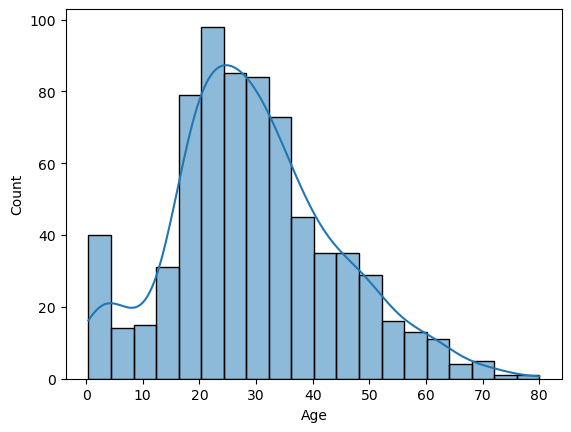

In [222]:
sns.histplot(df["Age"], kde = True)
plt.show()

As we can see, the highest age group was between 20 to 30, while there is also a good ammount of people in the ages 30-50 which might indicate that the trip wasnt solely for entertainment nor it was for old people but rather somewhere in the middle or it had a lot of buisnessmen and starters. And the spike for ages 0-4 indicate having babies, meaning many atendees where parents.

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

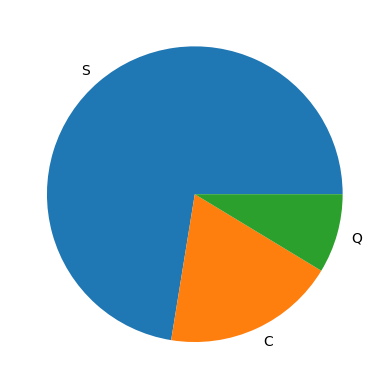

In [223]:
# your code here

#Get count of each value in embarked and make piechart.
s = df.value_counts("Embarked")
ax = plt.pie(s,labels =  s.index)
plt.show()

So S is the most embarked , now we get the distribution of gender and age for that port each
independantly.

Sex     Embarked
female  S           203
male    S           441
Name: Embarked, dtype: int64


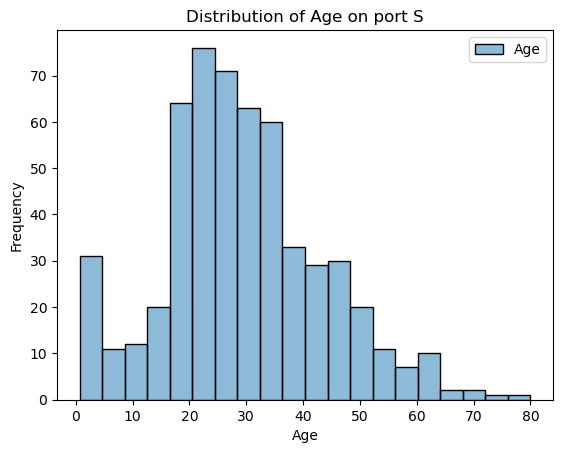

In [224]:
sPortDf = df[df["Embarked"] == "S"] #Create subDataframe for port S only

#Show distribution by gender
genderPortDf = sPortDf.groupby("Sex")["Embarked"].value_counts() 
print(genderPortDf)


#Show distribution by age
sns.histplot(data=sPortDf[["Age"]])

plt.title('Distribution of Age on port S')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

As shown above, 441 males were embarked to board S, compared to only 203 females, meaning that this
board didnt follow "women first" policy. On the other hand, age had much more adults embarked onto
board S. Although there is a spike in ages from 0 to 4 and some ammount of children below 18 was there, adults make up most of our distribution, indicating that board S didnt follow "women and children first" evacuation policy

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

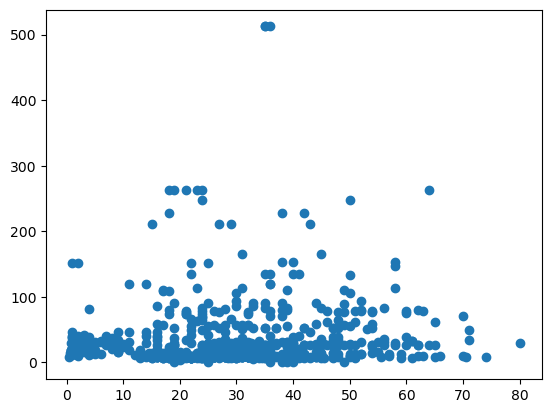

In [225]:
# your code here
plt.scatter(df["Age"], df["Fare"])
plt.show()

There doesnt seem to be a correlation between age and fare.

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


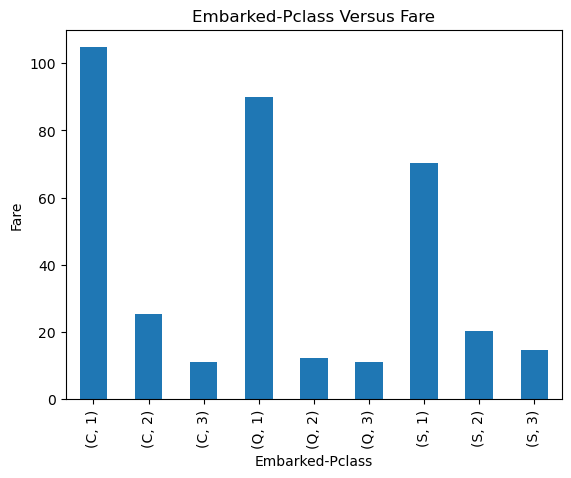

In [226]:
# your code here

#Group data then plot a bar chart
subDf = df.groupby(["Embarked", "Pclass"]).mean()["Fare"]
subDf.plot(kind='bar', title='Embarked-Pclass Versus Fare', ylabel='Fare', xlabel='Embarked-Pclass')
plt.show()

Overall going through Pclasses 1 to 3, 1 is the most expensive while 3 is the cheapest across all embarking points. For embarkation points, however, it seems that C has the highest fare, Q has the second, while S has the least

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
